In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


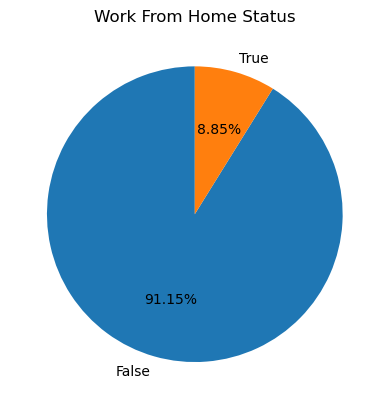

In [6]:
#Pie chart for remote work type

df['job_work_from_home'].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.2f%%')
plt.title('Work From Home Status')
plt.ylabel('')
plt.show()

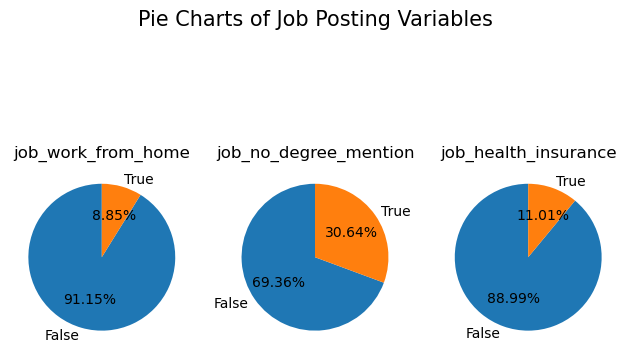

In [7]:
#Subplot with three pie charts (my first attempt)

variables = ['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']

fig, ax = plt.subplots(1, 3)

for i, variable in enumerate(variables):
    df[variable].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.2f%%', ax = ax[i], title = variable)
    ax[i].set_ylabel('')

fig.suptitle('Pie Charts of Job Posting Variables', fontsize = 15)
fig.tight_layout()


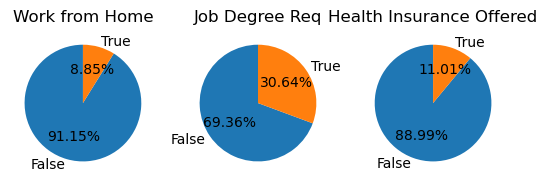

In [10]:
#Subplot with three pie charts (course answer)

fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct = '%1.2f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

plt.show()